In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/eyasu/Desktop/Kifiya/Week-1/raw_analyst_ratings.csv/raw_analyst_ratings.csv')

In [17]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [18]:
print(df.shape)

(1407328, 6)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


Descriptive Statistics

In [17]:
df['headline_length'] = df['headline'].str.len()
headline_stats = df['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [18]:
df['url_length'] = df['url'].str.len()
url_stats = df['url_length'].describe()
print(url_stats)

count    1.407328e+06
mean     1.105045e+02
std      1.916913e+01
min      3.300000e+01
25%      9.400000e+01
50%      1.150000e+02
75%      1.250000e+02
max      1.620000e+02
Name: url_length, dtype: float64


In [19]:
df['publisher_length'] = df['publisher'].str.len()
publisher_stats = df['publisher_length'].describe()
print(publisher_stats)

count    1.407328e+06
mean     1.277136e+01
std      2.701927e+00
min      3.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.400000e+01
max      4.600000e+01
Name: publisher_length, dtype: float64


In [20]:
df['date_length'] = df['date'].str.len()
date_stats = df['date_length'].describe()
print(date_stats)

count    1.407328e+06
mean     1.923869e+01
std      1.172687e+00
min      1.900000e+01
25%      1.900000e+01
50%      1.900000e+01
75%      1.900000e+01
max      2.500000e+01
Name: date_length, dtype: float64


In [21]:
# The publishers that are most active
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [12]:
# Analyssis on publication dates
from datetime import datetime

def parse_date_with_default(date_string):
    try:
        parsed_date = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
        return parsed_date.date()
    except ValueError:
        raise ValueError("Invalid date format: " + date_string)
df['date'] = pd.to_datetime(df['date'])
daily_counts = df['date'].dt.date.value_counts().sort_index()
print(daily_counts)

date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 3955, dtype: int64


Text Analysis(Sentiment analysis & Topic Modeling)

In [13]:
# Perform sentiment analysis on headlines to gauge the sentiment positive, negative, neutral
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
print(df[['date', 'headline', 'sentiment_label']].head())

        date                                           headline  \
0 2020-06-05            Stocks That Hit 52-Week Highs On Friday   
1 2020-06-03         Stocks That Hit 52-Week Highs On Wednesday   
2 2020-05-26                      71 Biggest Movers From Friday   
3 2020-05-22       46 Stocks Moving In Friday's Mid-Day Session   
4 2020-05-22  B of A Securities Maintains Neutral on Agilent...   

  sentiment_label  
0         Neutral  
1         Neutral  
2         Neutral  
3         Neutral  
4        Positive  


Publisher Analysis

In [26]:
publisher_counts = df['publisher'].value_counts()
top_publishers = publisher_counts.head(10) 
print(top_publishers)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [28]:

sid = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['headline'].apply(lambda x: sid.polarity_scores(x))
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])
sentiment_distribution = df.groupby('publisher')['compound_score'].mean()
top_publishers = sentiment_distribution.nlargest(10)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\eyasu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


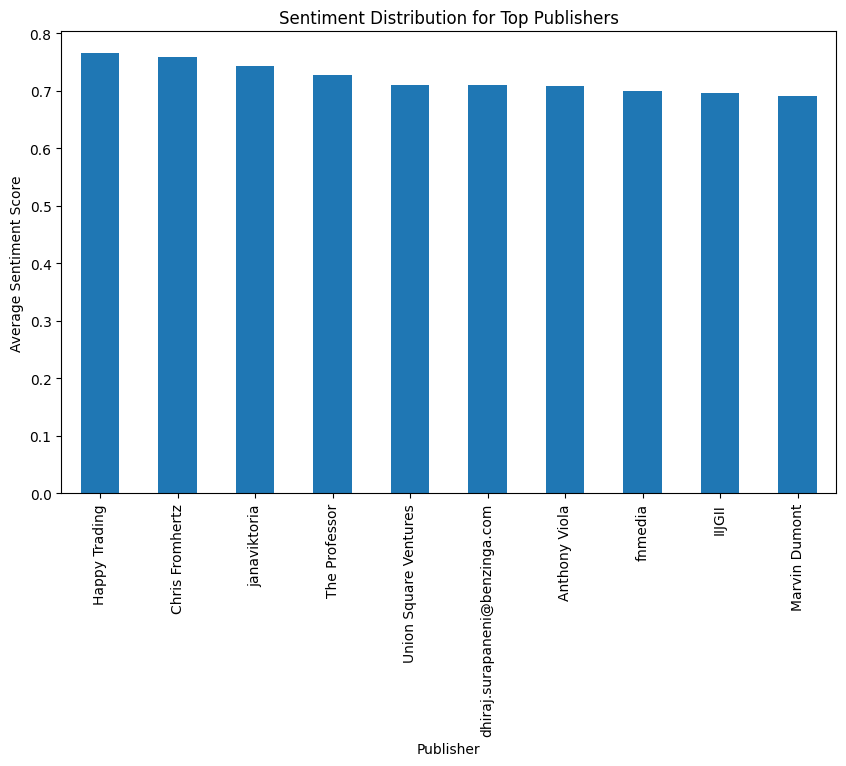

In [30]:
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Distribution for Top Publishers')
plt.show()